### Telecom churn prediction:
**Faseela K Karim**

## Introduction
In this notebook, we will be exploring a customer churn dataset and building a neural network model to predict customer churn with the help of TSNE. We will start by preprocessing the data and performing dimensionality reduction using t-SNE. Then, we will train and evaluate a neural network model on the reduced data. We will use the Keras library for building and training the neural network model. We will also use various preprocessing techniques like standard scaling to preprocess the data. Throughout this notebook, we will be using Python and various libraries such as pandas, numpy, matplotlib, seaborn, and tensorflow. So let's get started and explore this dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# #uploading the dataset
# #output of onehot encoding used here,no columns deleted based on collinearity
# df_train=pd.read_csv('/content/drive/My Drive/final_capstone/train_data_onehot.csv',index_col=0)
# df_test=pd.read_csv('/content/drive/My Drive/final_capstone/test_data_onehot.csv',index_col=0)

In [ ]:
#uploading the dataset from local drive

df_train=pd.read_csv('data/train_data_onehot.csv',index_col=0)
df_test=pd.read_csv('data/test_data_onehot.csv',index_col=0)

In [4]:
#seperating target variable from test and train data
X_train =df_train.drop('churn',axis=1)
X_test=df_test.drop('churn',axis=1)
y_train=df_train.churn
y_test=df_test.churn

In [5]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(df_train)
X_test_scaled=scaler.transform(df_test)

In [6]:
df_train_new=df_train
df_test_new=df_test

## Performing TSNE

TSNE is a popular technique for reducing high-dimensional data to lower dimensions for machine learning. It is particularly useful for visualizing complex data, as it can transform data into a 2D or 3D space that can be easily plotted too. In this context, TSNE was used to reduce the dimensionality of the customer churn dataset, allowing for easy processing. The reduced data was then fed into a neural network for prediction. By using TSNE as a dimension reducer, the model can achieve a high accuracy.

In [ ]:
from sklearn.manifold import TSNE

In [7]:
df_train.shape

(75000, 126)

In [8]:
df_test.shape

(25000, 126)

In [ ]:
tsne = TSNE(n_components=3,perplexity=40, random_state=42)

#We also need to drop the cluster labels so that t-sne won't use them when computing distance
tsne_data = tsne.fit_transform(df_train)

In [ ]:
tsne_df = pd.DataFrame(tsne_data, columns=[f'tsne D{i+1}' for i in range(tsne_data.shape[1])])
# pca_df['kmeans_labels'] = X_train_4['cluster'].values
tsne_df['churn'] = df_train_new['churn'].values


In [ ]:
tsne_test_data = tsne.fit_transform(df_test)

In [ ]:
tsne_df_test = pd.DataFrame(tsne_test_data, columns=[f'tsne D{i+1}' for i in range(tsne_data.shape[1])])
# pca_df['kmeans_labels'] = X_train_4['cluster'].values
tsne_df_test['churn'] = df_test_new['churn'].values


## Importing Neural Network Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

## Function for Neural network Training.

This code defines a function for training a neural network on the customer churn dataset. The function takes in the preprocessed training and test data sets as input, creates a sequential neural network model with four hidden layers and one output layer, compiles the model with binary cross-entropy loss and accuracy metrics, trains the model on the training data for 15 epochs, and evaluates the model on the test set. The trained model, test loss, and test accuracy are returned as output from the function. This function can be used to train and evaluate multiple neural network models with different configurations of hidden layers and other hyperparameters to identify the best model for predicting customer churn.

In [ ]:
import tensorflow as tf

def train_neural_network(X_train_scaled, y_train, X_test_scaled, y_test):
    # Create a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=15, batch_size=50, validation_split=0.1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

    return model, test_loss, test_accuracy


## Here is TSNE being fed into Neural network

In this code, the t-SNE embeddings generated earlier are fed into a neural network model. The code first separates the churn column from the tsne_df dataframe and scales the numerical features using a standard scaler. The same process is also performed for the test set. Then, the train_neural_network function is called to train the model and evaluate its performance on the test set. The test loss and test accuracy are printed to the console. This process is repeated for the tsne_df dataset.

In [ ]:
#tsne_df has been made earlier
tsne_df_x=tsne_df.drop('churn',axis=1)
tsne_y=tsne_df.churn

In [ ]:
tsne_df_x_test=tsne_df_test.drop('churn',axis=1)
tsne_y_test=tsne_df_test.churn

Epoch 1/15
1620/1620 [==============================] - 14s 8ms/step - loss: 0.6807 - accuracy: 0.5686 - val_loss: 0.6674 - val_accuracy: 0.5943
Epoch 2/15
1620/1620 [==============================] - 10s 6ms/step - loss: 0.6684 - accuracy: 0.5935 - val_loss: 0.6626 - val_accuracy: 0.6049
Epoch 3/15
1620/1620 [==============================] - 10s 6ms/step - loss: 0.6625 - accuracy: 0.6008 - val_loss: 0.6599 - val_accuracy: 0.6046
Epoch 4/15
1620/1620 [==============================] - 10s 6ms/step - loss: 0.6590 - accuracy: 0.6045 - val_loss: 0.6635 - val_accuracy: 0.6028
Epoch 5/15
1620/1620 [==============================] - 11s 7ms/step - loss: 0.6555 - accuracy: 0.6099 - val_loss: 0.6561 - val_accuracy: 0.6107
Epoch 6/15
1620/1620 [==============================] - 10s 6ms/step - loss: 0.6529 - accuracy: 0.6138 - val_loss: 0.6553 - val_accuracy: 0.6088
Epoch 7/15
1620/1620 [==============================] - 10s 6ms/step - loss: 0.6500 - accuracy: 0.6198 - val_loss: 0.6571 - val_ac

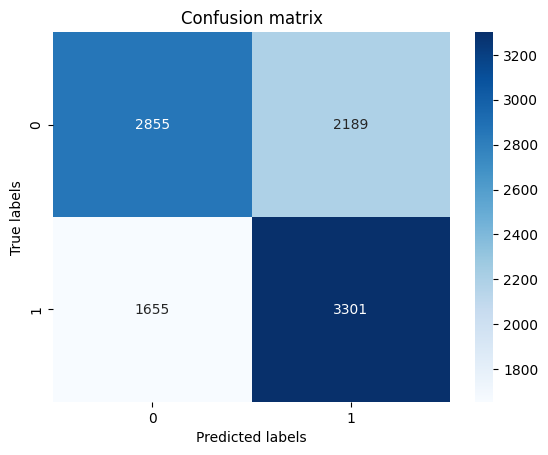

Test Loss: 0.6526330709457397, Test Accuracy: 0.6155999898910522
              precision    recall  f1-score   support

           0       0.63      0.57      0.60      5044
           1       0.60      0.67      0.63      4956

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.61     10000
weighted avg       0.62      0.62      0.61     10000



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Train the neural network by calling the nural network training function.
model, test_loss, test_accuracy = train_neural_network(X_train_scaled, y_train, X_test_scaled, y_test)


# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

# Print the test loss and test accuracy
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


# Calculate the classification report
report = classification_report(y_test, y_pred_classes)

# Print the classification report
print(report)

The confusion matrix shows the values predicted correctly and the false predictions. The diagonal shows true predictions. True predictions are more than false ones, but still needs improvement. 

## Conclusion 


From the output, we can see that the neural network model was trained on the reduced dimensionality dataset using t-SNE and evaluated on the test set. The model's accuracy is not improved compared to other models we already done.
However, it is important to note that this is just one iteration of training a neural network model, and we can further improve the accuracy by experimenting with different configurations of hidden layers and other hyperparameters of the neural network. We can also try different dimensionality reduction techniques and compare their performance.